In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading and Understanding the Data
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# drop columns
df.drop(["dteday", "casual", "instant", "registered"], axis = 1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# Labelling seasons as spring, winter, fall, summer
d={1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df["season"]=df["season"].map(d)


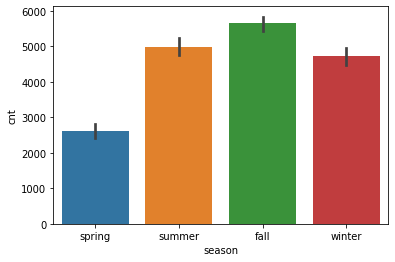

In [9]:
# Plotting relationship between season and count
sns.barplot("season", "cnt", data=df)
plt.show()

In [10]:
# Labelling months
d={1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December" }
df["mnth"]=df["mnth"].map(d)

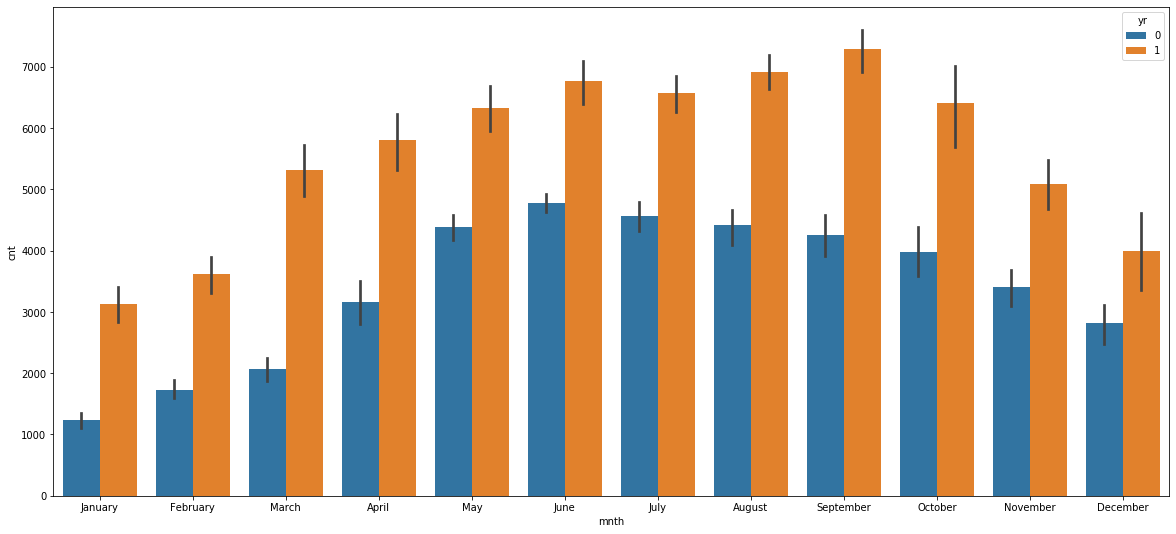

In [11]:
# Plotting relationship between season and count
plt.figure(figsize=(20, 9))
sns.barplot("mnth", "cnt", hue="yr", data=df)
plt.show()

##Here 0 = 2018 and 1= 2019, hence it can be observed that the bike rentals are more in the year 2019 than in 2018.

In [12]:
# Labelling weathersit
d={1:"Clear, Few clouds, Partly cloudy, Partly cloudy", 2:"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", 3:"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", 4:"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

df["weathersit"]=df["weathersit"].map(d)

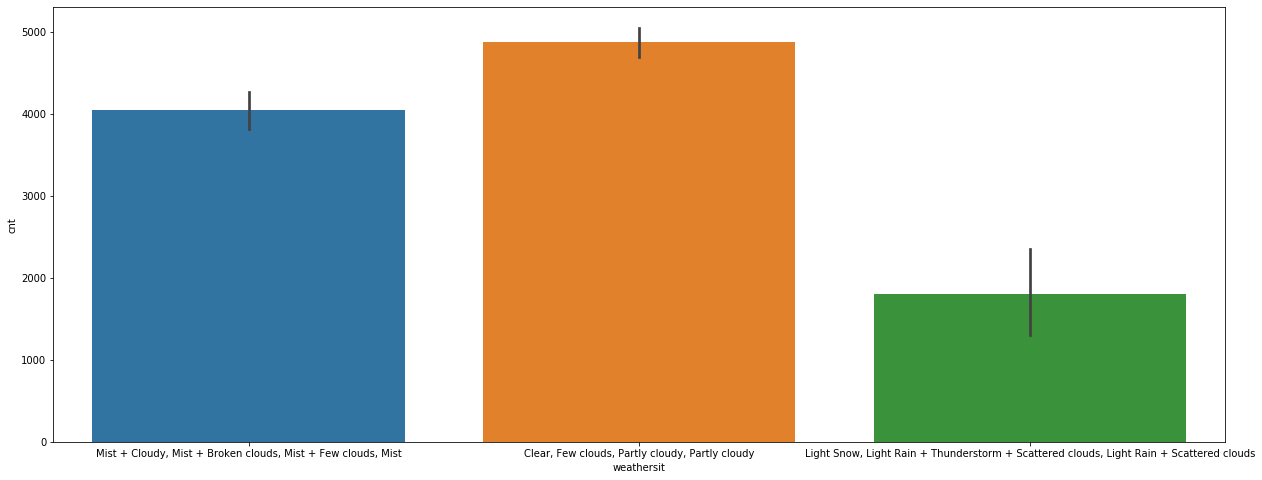

In [13]:
# Plotting relationship between weather situations and count
plt.figure(figsize=(21, 8))
sns.barplot("weathersit", "cnt", data=df)
plt.show()

It can be observed that on clear, few clouds, partly cloudy weather conditions bike rentals are highest.

In [14]:
# Labelling weekdays
d={1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday"}
df["weekday"]=df["weekday"].map(d)


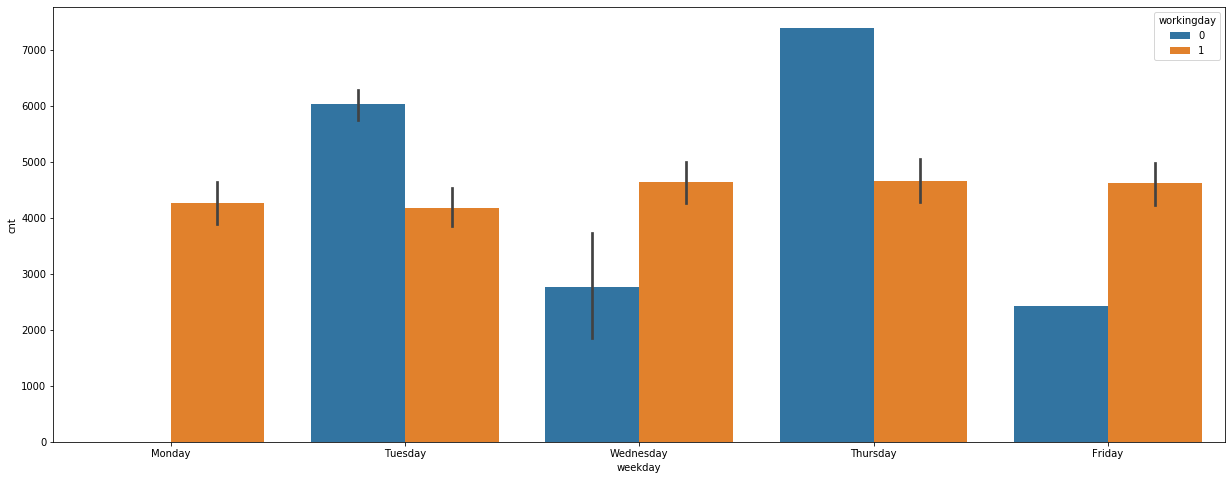

In [15]:
plt.figure(figsize=(21, 8))
sns.barplot("weekday", "cnt", hue="workingday", data=df)
plt.show()

 bike rentals are almost availed on all weekdays however,  on thursday rentals are highest irrespective of working or nonworking day. 

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


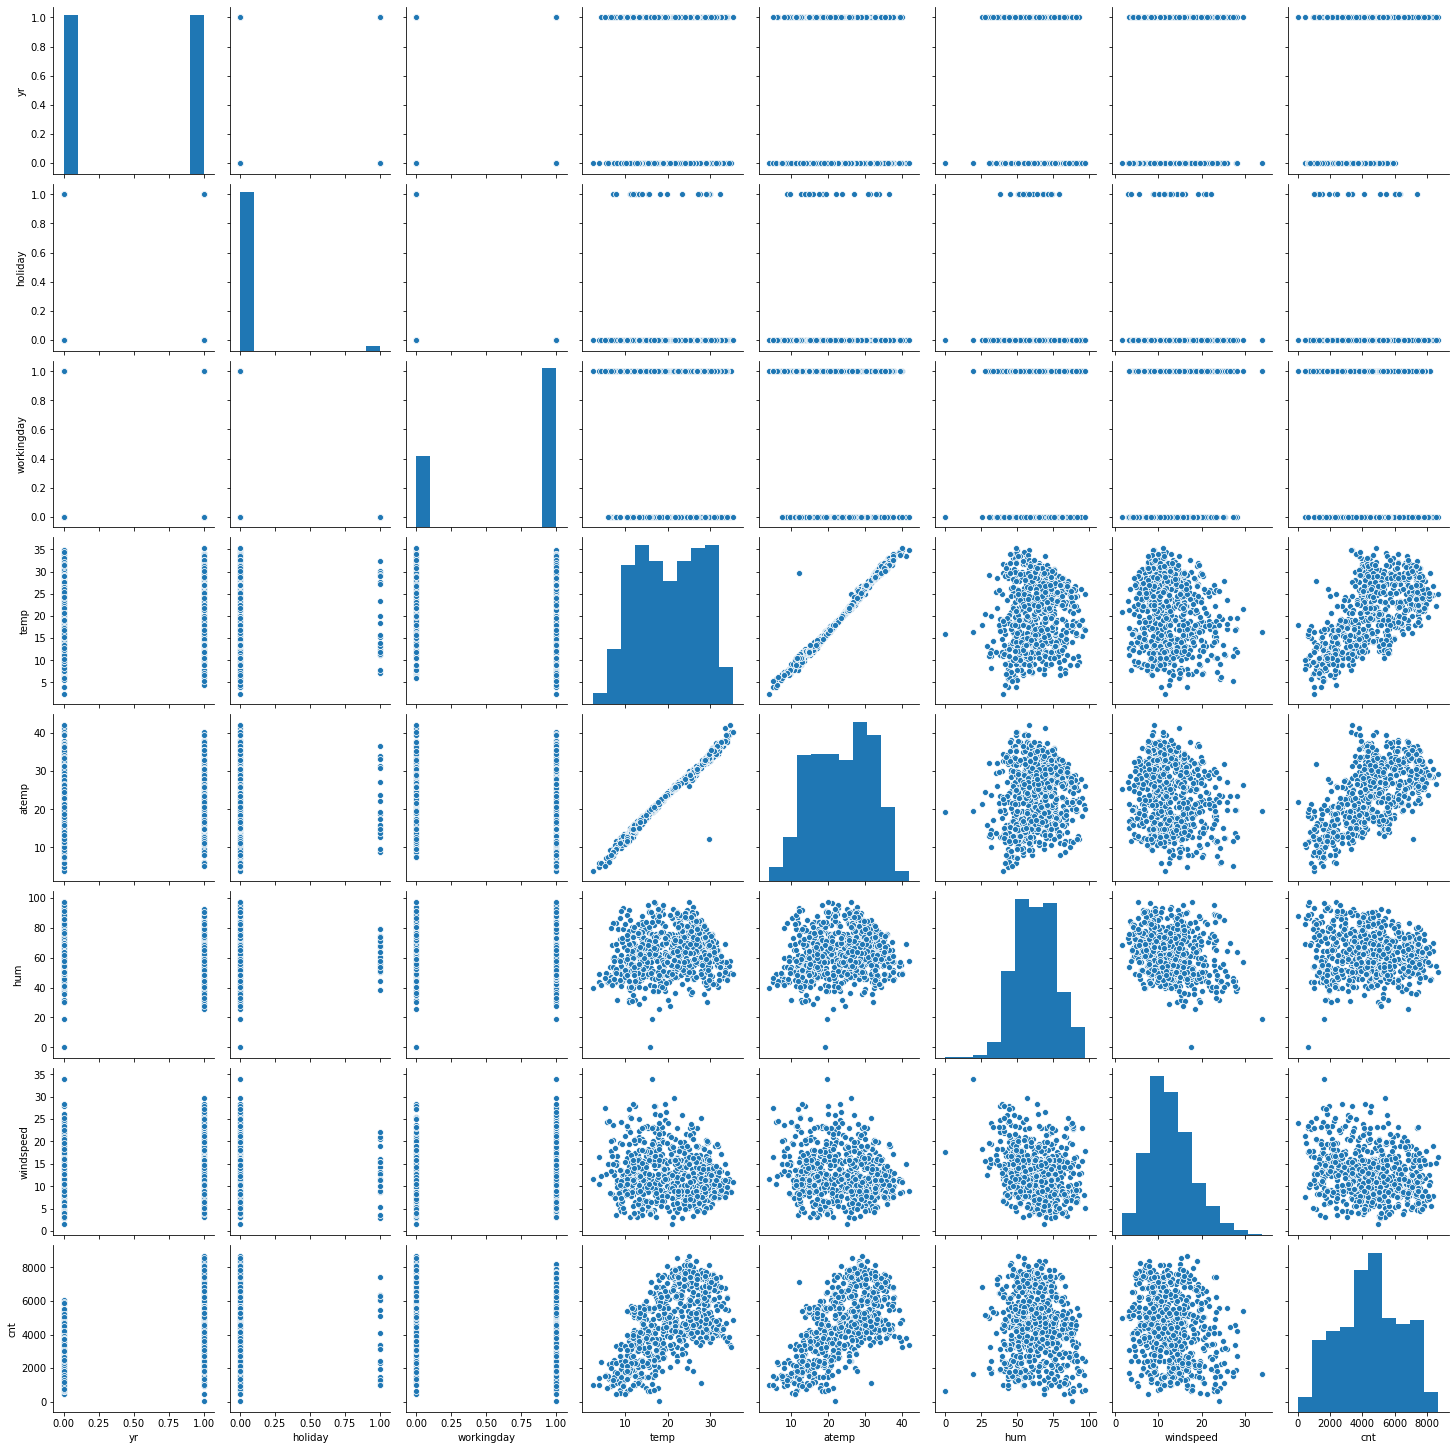

In [17]:
# Visualising numeric variables
sns.pairplot(df)
plt.show()

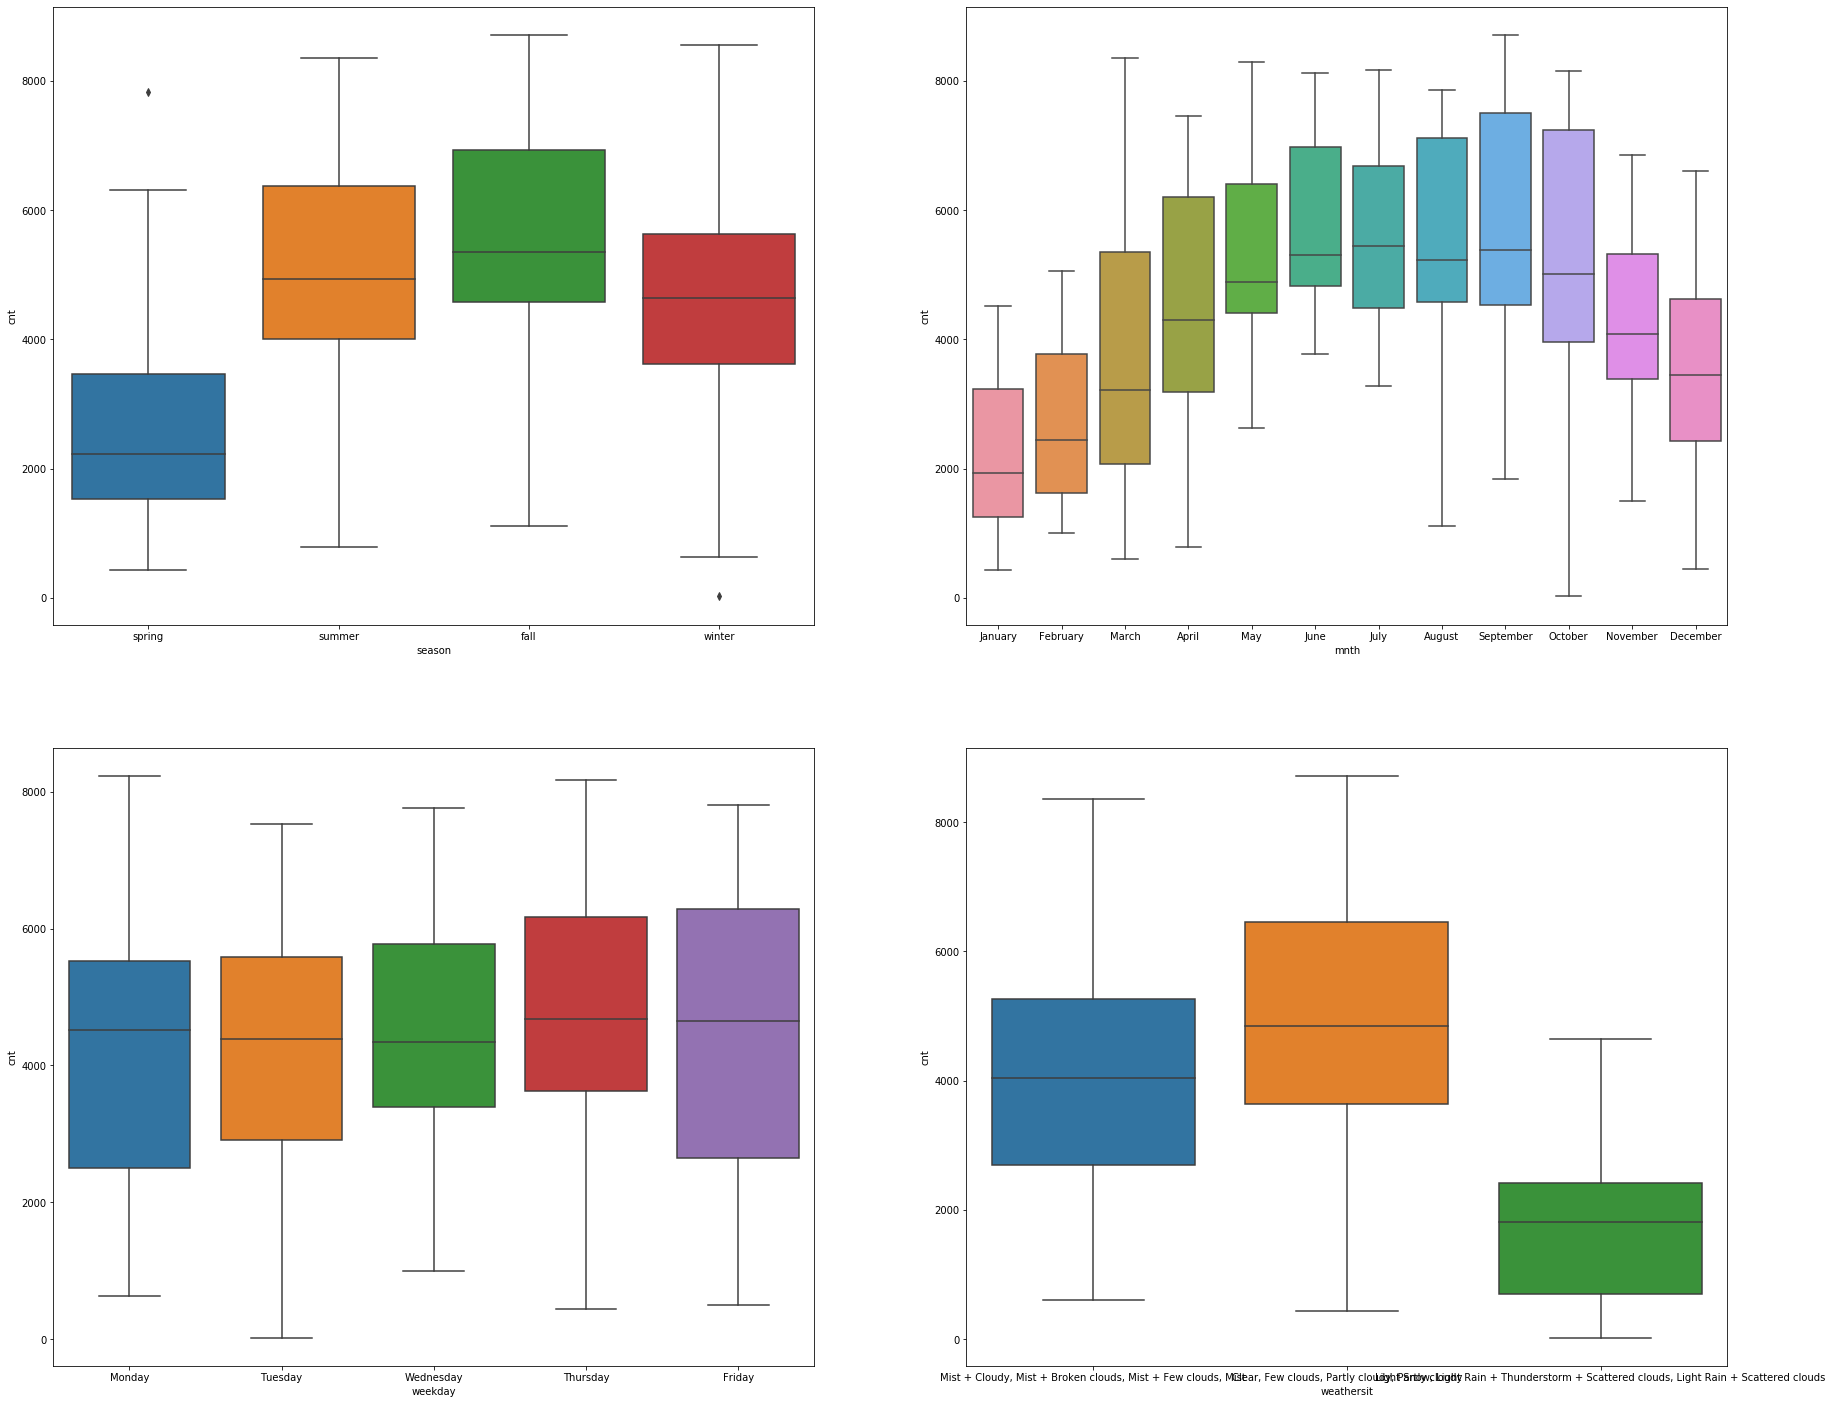

In [18]:
# Visualising categorical variables
plt.figure(figsize=(30, 25))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


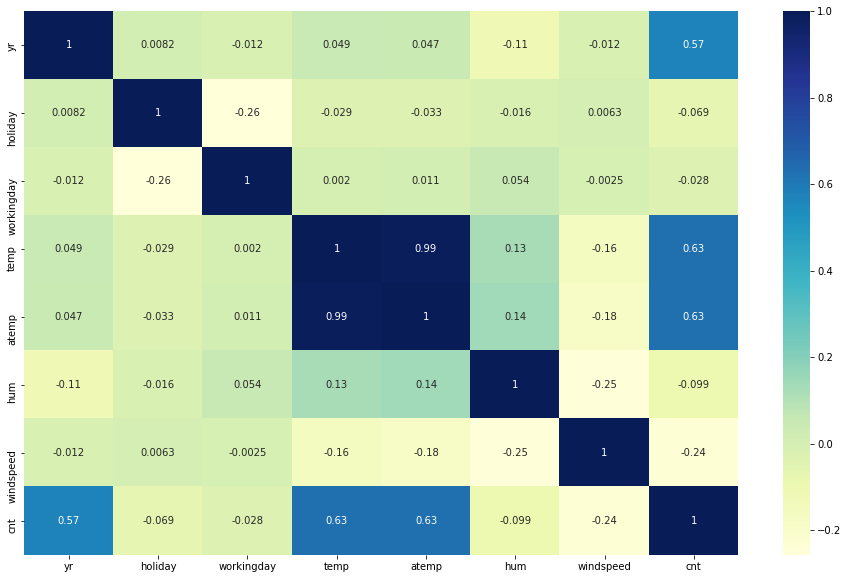

In [20]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

It can be observed that temp and atemp are highly correlated hence one of them can be dropped.

In [21]:
# Dropping atemp column
df.drop(["atemp"], axis = 1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


In [22]:
# Preparing Dummy variables for all the categorical variables
# The dummy variables for the feature 'season' and store it in a new variable - 'seasons'

In [23]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
month = pd.get_dummies(df['mnth'], drop_first = True)
seasons = pd.get_dummies(df['season'], drop_first = True)
weekdays = pd.get_dummies(df['weekday'], drop_first = True)
working = pd.get_dummies(df['workingday'], drop_first = True)
weather = pd.get_dummies(df['weathersit'], drop_first = True)

In [24]:
df = pd.concat([df, seasons, month, weekdays, working, weather], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,November,October,September,Monday,Thursday,Tuesday,Wednesday,1,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,spring,0,January,0,Monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,1,0,1
1,spring,0,January,0,Tuesday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,1,0,1
2,spring,0,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,January,0,Thursday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,January,0,Friday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Dropping the categorical variables as their dummies already exist

df.drop(['season', 'mnth', 'weekday', 'workingday', 'weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,August,...,November,October,September,Monday,Thursday,Tuesday,Wednesday,1,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Splitting the Data into Training and Testing Sets
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
# Rescaling features
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,August,...,November,October,September,Monday,Thursday,Tuesday,Wednesday,1,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,0,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,August,...,November,October,September,Monday,Thursday,Tuesday,Wednesday,1,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.086275,0.080392,0.154902,0.143137,0.152941,0.135294,0.711765,0.029412,0.343137
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.281045,0.272166,0.362166,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


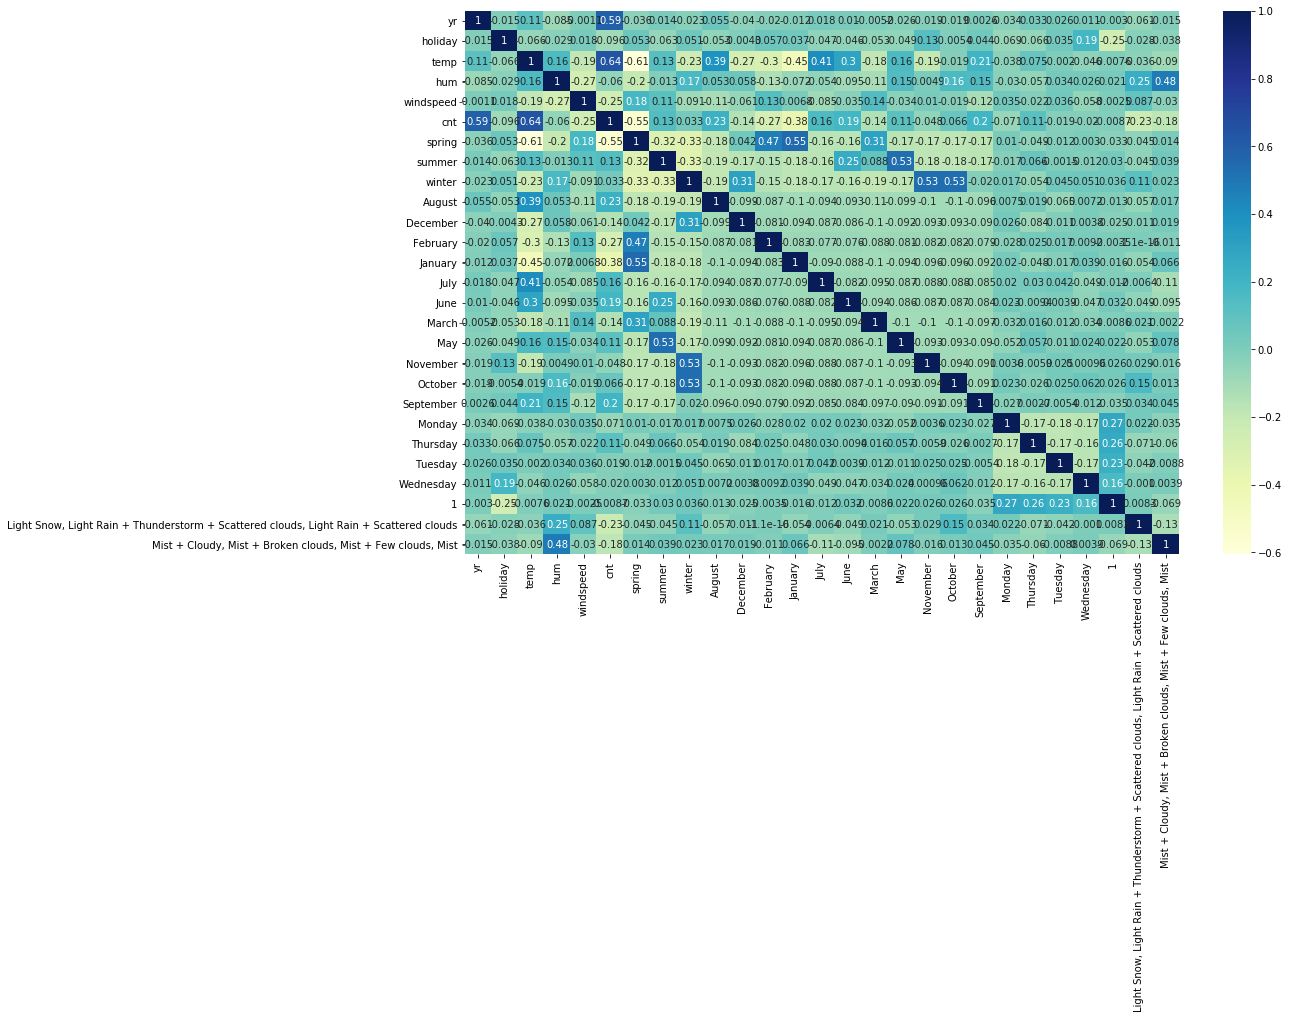

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp seems to be correlated to cnt the most. Let's see a pairplot for temp vs count.

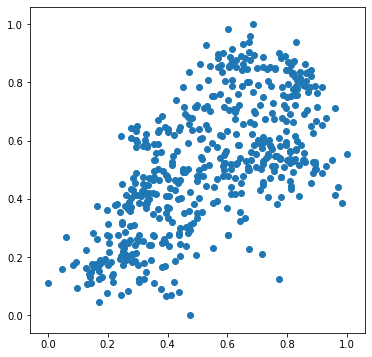

In [30]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [31]:

# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model
Fit a regression line through the training data using statsmodels. 

In [32]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

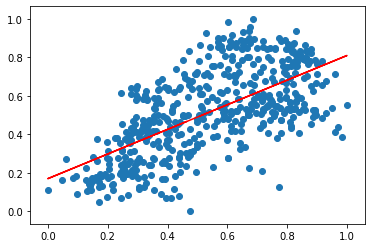

In [33]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [34]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           5.80e-61
Time:                        23:59:34   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [35]:
# Adding all the variables to the model
# Check all the columns of the dataframe
df.columns

Index([                                                                                     'yr',
                                                                                       'holiday',
                                                                                          'temp',
                                                                                           'hum',
                                                                                     'windspeed',
                                                                                           'cnt',
                                                                                        'spring',
                                                                                        'summer',
                                                                                        'winter',
                                                                                        'August',
                    

In [36]:
#Build a linear model
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                                                                                      0.340554
yr                                                                                         0.231275
holiday                                                                                   -0.091476
temp                                                                                       0.446380
hum                                                                                       -0.156324
windspeed                                                                                 -0.183276
spring                                                                                    -0.043946
summer                                                                                     0.041992
winter                                                                                     0.110110
August                                                                                     0.020625


In [37]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.85e-181
Time:                        23:59:34   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -992.8
Df Residuals:                     483   BIC:                            -878.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3406      0.044      7.746      0.000       0.254       0.427
yr                                                                                          0.2313      0.008     28.528      0.000       0.215       0.247
holiday                                                                                    -0.0915      0.029     -3.209      0.001      -0.147      -0.035
temp                                                                                        0.4464      0.047      9.555      0.000       0.355       0.538
hum                                                                                        -0.1563      0.039     -4.031      0.000      -0.233      -0.080
windspeed                                                                                  -0.1833      0.026     -7.060      0.000      -0.234      -0.132
spring                                                                                     -0.0439      0.030     -1.455      0.146      -0.103       0.015
summer                                                                                      0.0420      0.026      1.591      0.112      -0.010       0.094
winter                                                                                      0.1101      0.028      3.917      0.000       0.055       0.165
August                                                                                      0.0206      0.034      0.607      0.544      -0.046       0.087
December                                                                                   -0.0449      0.034     -1.328      0.185      -0.111       0.022
February                                                                                   -0.0365      0.033     -1.100      0.272      -0.102       0.029
January                                                                                    -0.0632      0.034     -1.870      0.062      -0.130       0.003
July                                                                                       -0.0356      0.035     -1.006      0.315      -0.105       0.034
June                                                                                        0.0007      0.025      0.026      0.979      -0.049       0.050
March                                                                                       0.0007      0.025      0.027      0.978      -0.048       0.049
May                                                                                         0.0235      0.021      1.11

In [38]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,38.05
2,temp,36.84
7,winter,11.74
5,spring,11.73
23,1,7.60
6,summer,6.76
17,October,6.39
16,November,6.06
8,August,5.86
12,July,5.25


In [39]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(1, 1)

In [40]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Print the summary of the model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.79e-182
Time:                        23:59:35   Log-Likelihood:                 523.20
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     484   BIC:                            -884.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3379      0.044      7.724      0.000       0.252       0.424
yr                                                                                          0.2314      0.008     28.569      0.000       0.215       0.247
holiday                                                                                    -0.0842      0.026     -3.215      0.001      -0.136      -0.033
temp                                                                                        0.4465      0.047      9.564      0.000       0.355       0.538
hum                                                                                        -0.1578      0.039     -4.079      0.000      -0.234      -0.082
windspeed                                                                                  -0.1835      0.026     -7.073      0.000      -0.234      -0.133
spring                                                                                     -0.0437      0.030     -1.447      0.149      -0.103       0.016
summer                                                                                      0.0425      0.026      1.613      0.107      -0.009       0.094
winter                                                                                      0.1104      0.028      3.930      0.000       0.055       0.166
August                                                                                      0.0211      0.034      0.622      0.534      -0.046       0.088
December                                                                                   -0.0449      0.034     -1.328      0.185      -0.111       0.022
February                                                                                   -0.0365      0.033     -1.101      0.272      -0.102       0.029
January                                                                                    -0.0632      0.034     -1.871      0.062      -0.130       0.003
July                                                                                       -0.0346      0.035     -0.979      0.328      -0.104       0.035
June                                                                                        0.0002      0.025      0.008      0.993      -0.049       0.050
March                                                                                       0.0006      0.025      0.023      0.982      -0.048       0.049
May                                                                                         0.0234      0.021      1.10

In [42]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.70
2,temp,36.76
7,winter,11.74
5,spring,11.73
6,summer,6.75
17,October,6.39
16,November,6.03
8,August,5.86
12,July,5.25
11,January,5.16


In [43]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("October", 1)

In [44]:
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.36e-183
Time:                        23:59:35   Log-Likelihood:                 523.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     485   BIC:                            -890.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3406      0.041      8.282      0.000       0.260       0.421
yr                                                                                          0.2313      0.008     28.614      0.000       0.215       0.247
holiday                                                                                    -0.0840      0.026     -3.213      0.001      -0.135      -0.033
temp                                                                                        0.4462      0.047      9.572      0.000       0.355       0.538
hum                                                                                        -0.1569      0.038     -4.091      0.000      -0.232      -0.082
windspeed                                                                                  -0.1835      0.026     -7.079      0.000      -0.234      -0.133
spring                                                                                     -0.0437      0.030     -1.448      0.148      -0.103       0.016
summer                                                                                      0.0405      0.024      1.696      0.090      -0.006       0.087
winter                                                                                      0.1129      0.024      4.610      0.000       0.065       0.161
August                                                                                      0.0181      0.030      0.612      0.541      -0.040       0.076
December                                                                                   -0.0497      0.020     -2.434      0.015      -0.090      -0.010
February                                                                                   -0.0396      0.028     -1.390      0.165      -0.096       0.016
January                                                                                    -0.0663      0.029     -2.283      0.023      -0.123      -0.009
July                                                                                       -0.0375      0.031     -1.199      0.231      -0.099       0.024
June                                                                                       -0.0015      0.023     -0.063      0.950      -0.048       0.045
March                                                                                      -0.0018      0.021     -0.083      0.934      -0.043       0.040
May                                                                                         0.0223      0.020      1.10

In [46]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,35.85
3,hum,34.94
5,spring,11.41
7,winter,6.96
6,summer,6.19
4,windspeed,4.99
8,August,4.90
12,July,4.49
11,January,4.23
10,February,3.21


In [47]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('March', 1)

In [48]:
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.75e-184
Time:                        23:59:36   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     486   BIC:                            -896.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3398      0.040      8.510      0.000       0.261       0.418
yr                                                                                          0.2313      0.008     28.647      0.000       0.215       0.247
holiday                                                                                    -0.0838      0.026     -3.216      0.001      -0.135      -0.033
temp                                                                                        0.4469      0.046      9.749      0.000       0.357       0.537
hum                                                                                        -0.1570      0.038     -4.098      0.000      -0.232      -0.082
windspeed                                                                                  -0.1833      0.026     -7.094      0.000      -0.234      -0.133
spring                                                                                     -0.0446      0.028     -1.598      0.111      -0.099       0.010
summer                                                                                      0.0404      0.024      1.696      0.090      -0.006       0.087
winter                                                                                      0.1131      0.024      4.641      0.000       0.065       0.161
August                                                                                      0.0183      0.029      0.624      0.533      -0.039       0.076
December                                                                                   -0.0490      0.018     -2.653      0.008      -0.085      -0.013
February                                                                                   -0.0381      0.022     -1.746      0.081      -0.081       0.005
January                                                                                    -0.0647      0.022     -2.952      0.003      -0.108      -0.022
July                                                                                       -0.0373      0.031     -1.197      0.232      -0.099       0.024
June                                                                                       -0.0012      0.023     -0.050      0.960      -0.047       0.044
May                                                                                         0.0228      0.020      1.160      0.247      -0.016       0.061
November                                                                                   -0.0487      0.019     -2.56

In [50]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,35.68
3,hum,34.34
5,spring,7.92
7,winter,6.94
6,summer,5.93
4,windspeed,4.99
8,August,4.89
12,July,4.48
16,September,2.90
13,June,2.57


In [51]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('June', 1)

In [52]:
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [53]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.07e-185
Time:                        23:59:36   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -903.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3397      0.040      8.526      0.000       0.261       0.418
yr                                                                                          0.2314      0.008     28.809      0.000       0.216       0.247
holiday                                                                                    -0.0838      0.026     -3.224      0.001      -0.135      -0.033
temp                                                                                        0.4457      0.039     11.524      0.000       0.370       0.522
hum                                                                                        -0.1567      0.038     -4.133      0.000      -0.231      -0.082
windspeed                                                                                  -0.1832      0.026     -7.138      0.000      -0.234      -0.133
spring                                                                                     -0.0442      0.027     -1.652      0.099      -0.097       0.008
summer                                                                                      0.0407      0.023      1.736      0.083      -0.005       0.087
winter                                                                                      0.1135      0.023      4.982      0.000       0.069       0.158
August                                                                                      0.0192      0.024      0.810      0.419      -0.027       0.066
December                                                                                   -0.0491      0.018     -2.688      0.007      -0.085      -0.013
February                                                                                   -0.0382      0.022     -1.775      0.077      -0.081       0.004
January                                                                                    -0.0650      0.021     -3.041      0.002      -0.107      -0.023
July                                                                                       -0.0364      0.025     -1.469      0.143      -0.085       0.012
May                                                                                         0.0232      0.017      1.331      0.184      -0.011       0.058
November                                                                                   -0.0488      0.019     -2.580      0.010      -0.086      -0.012
September                                                                                   0.0836      0.022      3.88

In [54]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.80
2,temp,21.22
5,spring,7.15
7,winter,5.93
6,summer,5.72
4,windspeed,4.94
8,August,3.12
12,July,2.79
11,January,2.41
21,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.36


In [55]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('August', 1)

In [56]:
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.03e-186
Time:                        23:59:37   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -908.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3503      0.038      9.319      0.000       0.276       0.424
yr                                                                                          0.2315      0.008     28.853      0.000       0.216       0.247
holiday                                                                                    -0.0843      0.026     -3.247      0.001      -0.135      -0.033
temp                                                                                        0.4481      0.039     11.622      0.000       0.372       0.524
hum                                                                                        -0.1554      0.038     -4.103      0.000      -0.230      -0.081
windspeed                                                                                  -0.1833      0.026     -7.147      0.000      -0.234      -0.133
spring                                                                                     -0.0565      0.022     -2.559      0.011      -0.100      -0.013
summer                                                                                      0.0277      0.017      1.621      0.106      -0.006       0.061
winter                                                                                      0.1021      0.018      5.701      0.000       0.067       0.137
December                                                                                   -0.0500      0.018     -2.743      0.006      -0.086      -0.014
February                                                                                   -0.0382      0.022     -1.775      0.077      -0.081       0.004
January                                                                                    -0.0649      0.021     -3.041      0.002      -0.107      -0.023
July                                                                                       -0.0500      0.018     -2.762      0.006      -0.086      -0.014
May                                                                                         0.0228      0.017      1.306      0.192      -0.011       0.057
November                                                                                   -0.0500      0.019     -2.651      0.008      -0.087      -0.013
September                                                                                   0.0726      0.017      4.336      0.000       0.040       0.106
Monday                                                                                     -0.0285      0.012     -2.42

In [58]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.23
2,temp,18.49
5,spring,5.46
4,windspeed,4.87
7,winter,4.12
6,summer,3.37
10,January,2.38
20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.36
0,yr,2.11
9,February,1.93


In [59]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("summer", 1)

In [60]:
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.86e-186
Time:                        23:59:37   Log-Likelihood:                 521.47
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -912.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3822      0.032     11.898      0.000       0.319       0.445
yr                                                                                          0.2323      0.008     28.960      0.000       0.217       0.248
holiday                                                                                    -0.0830      0.026     -3.193      0.001      -0.134      -0.032
temp                                                                                        0.4169      0.033     12.452      0.000       0.351       0.483
hum                                                                                        -0.1524      0.038     -4.022      0.000      -0.227      -0.078
windspeed                                                                                  -0.1785      0.026     -6.994      0.000      -0.229      -0.128
spring                                                                                     -0.0784      0.017     -4.499      0.000      -0.113      -0.044
winter                                                                                      0.0848      0.014      5.888      0.000       0.057       0.113
December                                                                                   -0.0563      0.018     -3.149      0.002      -0.091      -0.021
February                                                                                   -0.0431      0.021     -2.017      0.044      -0.085      -0.001
January                                                                                    -0.0717      0.021     -3.420      0.001      -0.113      -0.031
July                                                                                       -0.0586      0.017     -3.379      0.001      -0.093      -0.025
May                                                                                         0.0352      0.016      2.245      0.025       0.004       0.066
November                                                                                   -0.0561      0.019     -3.027      0.003      -0.092      -0.020
September                                                                                   0.0627      0.016      4.015      0.000       0.032       0.093
Monday                                                                                     -0.0285      0.012     -2.416      0.016      -0.052      -0.005
Thursday                                                                                 -2.56e-05      0.012     -0.00

In [62]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.34
2,temp,17.42
5,spring,4.28
4,windspeed,4.15
6,winter,3.19
9,January,2.38
19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.31
0,yr,2.08
8,February,1.92
12,November,1.85


In [63]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("Thursday", 1)

In [64]:
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.52e-187
Time:                        23:59:38   Log-Likelihood:                 521.47
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3821      0.032     11.999      0.000       0.320       0.445
yr                                                                                          0.2323      0.008     29.002      0.000       0.217       0.248
holiday                                                                                    -0.0830      0.026     -3.198      0.001      -0.134      -0.032
temp                                                                                        0.4169      0.033     12.469      0.000       0.351       0.483
hum                                                                                        -0.1524      0.038     -4.026      0.000      -0.227      -0.078
windspeed                                                                                  -0.1785      0.025     -7.002      0.000      -0.229      -0.128
spring                                                                                     -0.0784      0.017     -4.508      0.000      -0.113      -0.044
winter                                                                                      0.0848      0.014      5.894      0.000       0.057       0.113
December                                                                                   -0.0563      0.018     -3.160      0.002      -0.091      -0.021
February                                                                                   -0.0431      0.021     -2.021      0.044      -0.085      -0.001
January                                                                                    -0.0717      0.021     -3.423      0.001      -0.113      -0.031
July                                                                                       -0.0586      0.017     -3.384      0.001      -0.093      -0.025
May                                                                                         0.0352      0.016      2.249      0.025       0.004       0.066
November                                                                                   -0.0560      0.018     -3.030      0.003      -0.092      -0.020
September                                                                                   0.0627      0.016      4.020      0.000       0.032       0.093
Monday                                                                                     -0.0285      0.011     -2.507      0.012      -0.051      -0.006
Tuesday                                                                                    -0.0298      0.011     -2.59

In [66]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.06
2,temp,17.39
5,spring,4.28
4,windspeed,4.13
6,winter,3.19
9,January,2.38
18,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.29
0,yr,2.08
8,February,1.92
12,November,1.85


In [67]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("Wednesday", 1)

In [68]:
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.50e-188
Time:                        23:59:38   Log-Likelihood:                 520.71
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -923.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3788      0.032     11.933      0.000       0.316       0.441
yr                                                                                          0.2321      0.008     28.969      0.000       0.216       0.248
holiday                                                                                    -0.0891      0.025     -3.498      0.001      -0.139      -0.039
temp                                                                                        0.4188      0.033     12.532      0.000       0.353       0.484
hum                                                                                        -0.1538      0.038     -4.064      0.000      -0.228      -0.079
windspeed                                                                                  -0.1773      0.025     -6.956      0.000      -0.227      -0.127
spring                                                                                     -0.0778      0.017     -4.473      0.000      -0.112      -0.044
winter                                                                                      0.0838      0.014      5.834      0.000       0.056       0.112
December                                                                                   -0.0554      0.018     -3.112      0.002      -0.090      -0.020
February                                                                                   -0.0433      0.021     -2.030      0.043      -0.085      -0.001
January                                                                                    -0.0722      0.021     -3.447      0.001      -0.113      -0.031
July                                                                                       -0.0586      0.017     -3.379      0.001      -0.093      -0.025
May                                                                                         0.0348      0.016      2.222      0.027       0.004       0.066
November                                                                                   -0.0545      0.018     -2.951      0.003      -0.091      -0.018
September                                                                                   0.0633      0.016      4.058      0.000       0.033       0.094
Monday                                                                                     -0.0258      0.011     -2.312      0.021      -0.048      -0.004
Tuesday                                                                                    -0.0268      0.011     -2.38

In [70]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.78
2,temp,17.39
5,spring,4.28
4,windspeed,4.13
6,winter,3.17
9,January,2.37
17,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.28
0,yr,2.08
8,February,1.92
12,November,1.84


In [71]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("spring", 1)

In [72]:
X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     155.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.38e-185
Time:                        23:59:39   Log-Likelihood:                 510.52
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     492   BIC:                            -908.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3339      0.031     10.879      0.000       0.274       0.394
yr                                                                                          0.2314      0.008     28.338      0.000       0.215       0.247
holiday                                                                                    -0.0913      0.026     -3.519      0.000      -0.142      -0.040
temp                                                                                        0.4791      0.031     15.374      0.000       0.418       0.540
hum                                                                                        -0.1640      0.039     -4.259      0.000      -0.240      -0.088
windspeed                                                                                  -0.1845      0.026     -7.116      0.000      -0.235      -0.134
winter                                                                                      0.1113      0.013      8.398      0.000       0.085       0.137
December                                                                                   -0.0654      0.018     -3.635      0.000      -0.101      -0.030
February                                                                                   -0.0856      0.020     -4.387      0.000      -0.124      -0.047
January                                                                                    -0.1105      0.019     -5.669      0.000      -0.149      -0.072
July                                                                                       -0.0577      0.018     -3.266      0.001      -0.092      -0.023
May                                                                                         0.0486      0.016      3.105      0.002       0.018       0.079
November                                                                                   -0.0526      0.019     -2.796      0.005      -0.090      -0.016
September                                                                                   0.0683      0.016      4.304      0.000       0.037       0.099
Monday                                                                                     -0.0252      0.011     -2.215      0.027      -0.047      -0.003
Tuesday                                                                                    -0.0265      0.011     -2.317      0.021      -0.049      -0.004
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2501      0.027     -9.34

In [74]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.99
2,temp,15.91
4,windspeed,3.83
5,winter,2.70
16,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.23
0,yr,2.07
11,November,1.84
8,January,1.73
6,December,1.59
9,July,1.47


In [75]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("Monday", 1)

In [76]:
X_train_lm = sm.add_constant(X)
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.94e-185
Time:                        23:59:39   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     493   BIC:                            -910.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3286      0.031     10.697      0.000       0.268       0.389
yr                                                                                          0.2318      0.008     28.292      0.000       0.216       0.248
holiday                                                                                    -0.0875      0.026     -3.367      0.001      -0.139      -0.036
temp                                                                                        0.4818      0.031     15.413      0.000       0.420       0.543
hum                                                                                        -0.1654      0.039     -4.278      0.000      -0.241      -0.089
windspeed                                                                                  -0.1868      0.026     -7.183      0.000      -0.238      -0.136
winter                                                                                      0.1110      0.013      8.349      0.000       0.085       0.137
December                                                                                   -0.0652      0.018     -3.611      0.000      -0.101      -0.030
February                                                                                   -0.0838      0.020     -4.285      0.000      -0.122      -0.045
January                                                                                    -0.1101      0.020     -5.625      0.000      -0.149      -0.072
July                                                                                       -0.0592      0.018     -3.337      0.001      -0.094      -0.024
May                                                                                         0.0502      0.016      3.197      0.001       0.019       0.081
November                                                                                   -0.0522      0.019     -2.765      0.006      -0.089      -0.015
September                                                                                   0.0687      0.016      4.316      0.000       0.037       0.100
Tuesday                                                                                    -0.0219      0.011     -1.935      0.054      -0.044       0.000
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2495      0.027     -9.292      0.000      -0.302      -0.197
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0547      0.011     -5.15

In [78]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.81
2,temp,15.91
4,windspeed,3.79
5,winter,2.70
15,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.22
0,yr,2.07
11,November,1.84
8,January,1.73
6,December,1.59
9,July,1.47


In [79]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("Tuesday", 1)

In [80]:
X_train_lm = sm.add_constant(X)
lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.40e-185
Time:                        23:59:40   Log-Likelihood:                 506.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     494   BIC:                            -912.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3294      0.031     10.693      0.000       0.269       0.390
yr                                                                                          0.2313      0.008     28.165      0.000       0.215       0.247
holiday                                                                                    -0.0891      0.026     -3.419      0.001      -0.140      -0.038
temp                                                                                        0.4838      0.031     15.440      0.000       0.422       0.545
hum                                                                                        -0.1716      0.039     -4.443      0.000      -0.248      -0.096
windspeed                                                                                  -0.1900      0.026     -7.302      0.000      -0.241      -0.139
winter                                                                                      0.1098      0.013      8.244      0.000       0.084       0.136
December                                                                                   -0.0640      0.018     -3.533      0.000      -0.100      -0.028
February                                                                                   -0.0842      0.020     -4.295      0.000      -0.123      -0.046
January                                                                                    -0.1095      0.020     -5.579      0.000      -0.148      -0.071
July                                                                                       -0.0613      0.018     -3.456      0.001      -0.096      -0.026
May                                                                                         0.0503      0.016      3.194      0.001       0.019       0.081
November                                                                                   -0.0516      0.019     -2.723      0.007      -0.089      -0.014
September                                                                                   0.0687      0.016      4.301      0.000       0.037       0.100
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2452      0.027     -9.138      0.000      -0.298      -0.192
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0535      0.011     -5.046      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       65.797   

In [82]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.58
2,temp,15.88
4,windspeed,3.77
5,winter,2.69
14,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.21
0,yr,2.06
11,November,1.84
8,January,1.73
6,December,1.59
9,July,1.47


In [83]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("hum", 1)

In [84]:
X_train_lm = sm.add_constant(X)
lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.57e-182
Time:                        23:59:40   Log-Likelihood:                 496.07
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     495   BIC:                            -898.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2406      0.024     10.074      0.000       0.194       0.288
yr                                                                                          0.2351      0.008     28.262      0.000       0.219       0.251
holiday                                                                                    -0.0902      0.027     -3.400      0.001      -0.142      -0.038
temp                                                                                        0.4495      0.031     14.529      0.000       0.389       0.510
windspeed                                                                                  -0.1604      0.026     -6.258      0.000      -0.211      -0.110
winter                                                                                      0.0991      0.013      7.424      0.000       0.073       0.125
December                                                                                   -0.0717      0.018     -3.906      0.000      -0.108      -0.036
February                                                                                   -0.0888      0.020     -4.450      0.000      -0.128      -0.050
January                                                                                    -0.1188      0.020     -5.976      0.000      -0.158      -0.080
July                                                                                       -0.0547      0.018     -3.037      0.003      -0.090      -0.019
May                                                                                         0.0395      0.016      2.496      0.013       0.008       0.071
November                                                                                   -0.0512      0.019     -2.657      0.008      -0.089      -0.013
September                                                                                   0.0632      0.016      3.898      0.000       0.031       0.095
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2930      0.025    -11.697      0.000      -0.342      -0.244
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0804      0.009     -9.055      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       67.276   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.086
Skew:                          -0.699 

In [86]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.08
3,windspeed,3.67
4,winter,2.42
0,yr,2.06
10,November,1.80
13,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
8,July,1.42
5,December,1.40
11,September,1.25
9,May,1.24


In [87]:
# Dropping highly correlated variables and insignificant variables
X = X.drop("November", 1)

In [88]:
X_train_lm = sm.add_constant(X)
lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [89]:
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.67e-182
Time:                        23:59:41   Log-Likelihood:                 492.46
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     496   BIC:                            -897.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2264      0.023      9.667      0.000       0.180       0.272
yr                                                                                          0.2351      0.008     28.082      0.000       0.219       0.252
holiday                                                                                    -0.0991      0.026     -3.740      0.000      -0.151      -0.047
temp                                                                                        0.4693      0.030     15.532      0.000       0.410       0.529
windspeed                                                                                  -0.1599      0.026     -6.204      0.000      -0.211      -0.109
winter                                                                                      0.0815      0.012      6.991      0.000       0.059       0.104
December                                                                                   -0.0521      0.017     -3.082      0.002      -0.085      -0.019
February                                                                                   -0.0803      0.020     -4.052      0.000      -0.119      -0.041
January                                                                                    -0.1089      0.020     -5.543      0.000      -0.147      -0.070
July                                                                                       -0.0578      0.018     -3.200      0.001      -0.093      -0.022
May                                                                                         0.0404      0.016      2.532      0.012       0.009       0.072
September                                                                                   0.0673      0.016      4.144      0.000       0.035       0.099
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2883      0.025    -11.467      0.000      -0.338      -0.239
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0795      0.009     -8.904      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       58.545   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.307
Skew:                          -0.639   Prob(JB):                     3.74e-28
Kurtosis:                       5.076   Cond. No.                         14.5
====================================

In [90]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.03
3,windspeed,3.60
0,yr,2.06
4,winter,1.55
12,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
8,July,1.42
9,May,1.24
10,September,1.24
5,December,1.23
7,January,1.21


Now, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only

In [91]:
# Residual Analysis of the train data
y_train_cnt = lr_14.predict(X_train_lm)

Text(0.5, 0, 'Errors')

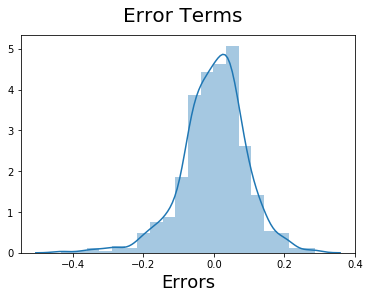

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [93]:
# Making Predictions Using the Final Model
# Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. ninth model.
# Applying the scaling on the test sets

In [94]:
pd.set_option('display.max_columns', None)
df_test.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Thursday,Tuesday,Wednesday,1,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,0,1,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
221,0,0,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
df_test.columns

Index([                                                                                     'yr',
                                                                                       'holiday',
                                                                                          'temp',
                                                                                           'hum',
                                                                                     'windspeed',
                                                                                           'cnt',
                                                                                        'spring',
                                                                                        'summer',
                                                                                        'winter',
                                                                                        'August',
                    

In [96]:
df_test.drop(1, axis = 1, inplace =True)

In [97]:
df_test.shape

(219, 26)

In [98]:
df_test.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [99]:
#num_vars = ["temp","windspeed","cnt", "hum"]
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [101]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [102]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["hum", "spring", "summer", "August", "June", "March", "November", "October", "Monday", "Thursday", "Tuesday", "Wednesday"], axis = 1)

In [103]:
# Making predictions using the fourth model

y_pred_m4 = lr_14.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

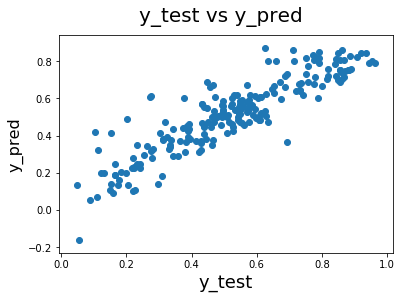

In [104]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [105]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_m4))

0.09862900807127006

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7951886363878068

In [107]:
X_test_new = X_test_m4.drop('const', axis = 1)
X_test_new.shape

(219, 13)

In [109]:
r2_score = 0.7951886363878068
adj_r2_score = 1 - (1-r2_score)*((219-1)/(219-13-1))
adj_r2_score

0.7822005986953262

#### Calculating Adjusted R-squared Value for Test Dataset
The formula for calculating `Adjusted R-squared` is:

### $ {R_a}^2 = 1 - (1 - R^2) * \frac{n - 1}{n - p - 1} $